<a href="https://colab.research.google.com/github/carlotamartin/Trazabilidad-de-los-tomates/blob/main/4_DataSplitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lectura de los datos

Importamos las librerías necesarias



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

  ### **Loading data**  

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/Data_cleaned.csv')
data.head()

,Temperature,Humidity,Latitud,Longitud,Brix,Acidez,Agua,Índice padurez,Calibre,Fertilizantes,Primavera,Verano,Otoño,Invierno,ID,Frescura
0,13.0,58.0,37.030147,-2.358589,5.48,0.41,96.80,12.73,8,0,1,0,0,1,2,1
1,13.0,58.0,36.785225,-2.724392,6.13,0.37,96.22,12.07,9,0,1,0,1,1,3,1
2,13.0,58.0,36.761562,-2.727947,5.59,0.44,96.92,12.70,11,1,1,0,0,1,1,1
3,13.0,58.0,36.852465,-2.452961,5.57,0.33,94.04,13.32,6,0,1,1,1,1,4,1
4,13.0,58.0,37.123766,-2.399430,7.38,0.53,88.08,15.52,3,1,1,0,1,1,5,1


## **ESCALAMOS LOS DATOS**

Primero dividimos los datos entre las variables independientes `X`y la variable dependiente `y`que en nuestro caso es `Frescura`

In [ ]:
#Importamos la función
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop(columns=['Frescura'])
y=data['Frescura']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Vamos a escalar los datos con el método de `MinMaxScaler()`. Este método sirve para poder escalar datos que no siguen una distribución normal.

In [ ]:
#Importamos la función
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Seleccionar las columnas numéricas para normalizar
cols_to_normalize = ['Temperature', 'Humidity', 'Latitud', 'Longitud', 'Brix', 'Acidez', 'Agua', 'Índice padurez', 'Calibre']

In [ ]:
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Aplicamos la normalización en las columnas seleccionadas
X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = scaler.transform(X_test[cols_to_normalize])

In [ ]:
X_train.head(3)

,Temperature,Humidity,Latitud,Longitud,Brix,Acidez,Agua,Índice padurez,Calibre,Fertilizantes,Primavera,Verano,Otoño,Invierno,ID
11724,0.769231,0.09375,0.817885,0.485887,0.803689,0.750,0.441874,0.406794,0.500000,0,1,0,0,1,6
3822,0.230769,0.12500,0.872798,0.976879,0.353096,0.275,0.935943,0.367026,0.583333,0,1,0,0,1,2
4084,0.384615,0.56250,0.878674,0.647433,0.102767,0.125,0.994069,0.420878,1.000000,0,1,0,1,1,16


In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_logistico=LogisticRegression()
modelo_logistico.fit(X_train , y_train)     #AJUSTAMOSM LOS DATOS DE LA X Y DE LA Y 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
y_pred = modelo_logistico.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("F1-score (weighted):", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.919211549139367
F1-score (weighted): 0.9175959004785286
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1317
           1       0.90      0.98      0.94      2285

    accuracy                           0.92      3602
   macro avg       0.93      0.90      0.91      3602
weighted avg       0.92      0.92      0.92      3602

Confusion matrix:
 [[1072  245]
 [  46 2239]]


Los resultados del modelo parecen ser bastante buenos, con una precisión (accuracy) de 0.9169 y un F1-score ponderado (weighted) de 0.9168. Esto significa que el modelo clasifica correctamente el 91,69% de las muestras. También podemos ver en la matriz de confusión que el modelo clasifica la mayoría de las muestras en la diagonal, lo que indica una buena precisión en general.

Sin embargo, debemos tener en cuenta que hay algunas clases (1, 2 y 11) en las que el modelo tiene un bajo rendimiento, con un F1-score inferior a 0.5 en cada una de ellas. Esto sugiere que el modelo puede tener dificultades para distinguir estas clases de las demás. Por lo tanto, es posible que se deba realizar una exploración adicional del conjunto de datos o una ingeniería de características para mejorar el rendimiento del modelo en estas clases.

## **Árboles de decisión**

El código presentado es un ejemplo de cómo utilizar un algoritmo de árbol de decisión para clasificar datos. En este caso, se utiliza el modelo `DecisionTreeClassifier` de la biblioteca `scikit-learn` para clasificar un conjunto de datos en 17 categorías diferentes. Se entrena el modelo con un conjunto de datos de entrenamiento y se evalúa su precisión en un conjunto de datos de prueba. Además, se calculan varias métricas de evaluación, incluyendo precisión, puntuación F1, matriz de confusión y un informe de clasificación.

In [ ]:
# Importamos la librería
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Crear modelo
tree_clf = DecisionTreeClassifier(random_state=100)

# Entrenar modelo
tree_clf.fit(X_train, y_train)

# Predecir resultados para el conjunto de test
y_pred_tree = tree_clf.predict(X_test)

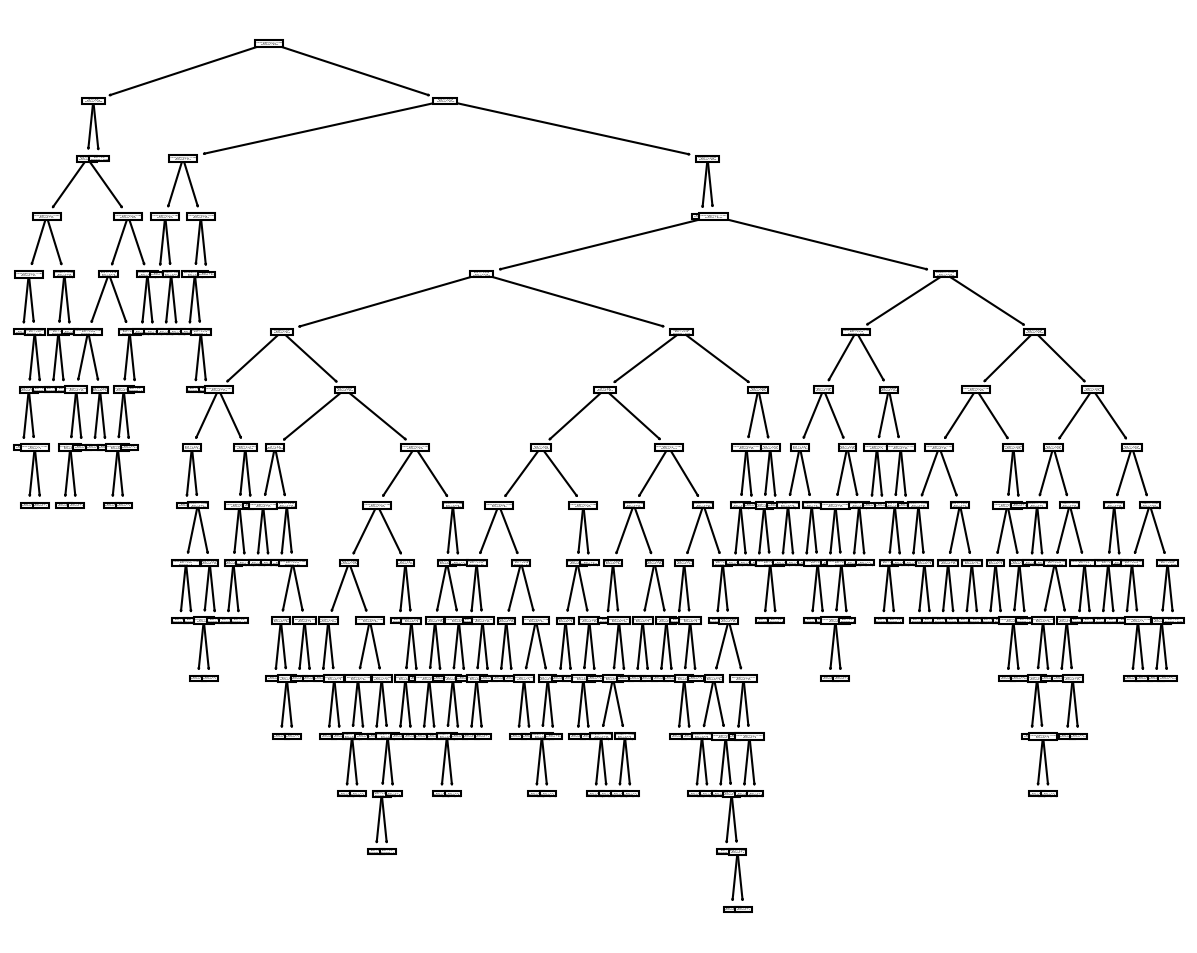

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(tree_clf, feature_names=X.columns);

In [ ]:
# Calcular métricas de evaluación
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
cr_tree = classification_report(y_test, y_pred_tree, zero_division=0)
cm_tree = confusion_matrix(y_test, y_pred_tree)

In [ ]:
print("Accuracy:", acc_tree)
print("F1-score (weighted):", f1_tree)
print("Classification report:\n", cr_tree)
print("Confusion matrix:\n", cm_tree)

Accuracy: 0.9805663520266519
F1-score (weighted): 0.9805848374460859
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1317
           1       0.99      0.98      0.98      2285

    accuracy                           0.98      3602
   macro avg       0.98      0.98      0.98      3602
weighted avg       0.98      0.98      0.98      3602

Confusion matrix:
 [[1288   29]
 [  41 2244]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Definir rango de profundidades a probar
depth_range = range(2, 31)

# Inicializar arrays para guardar los resultados
acc_scores = []
f1_scores = []

In [ ]:
for depth in depth_range:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=100)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred_tree))
    f1_scores.append(f1_score(y_test, y_pred_tree, average='weighted'))

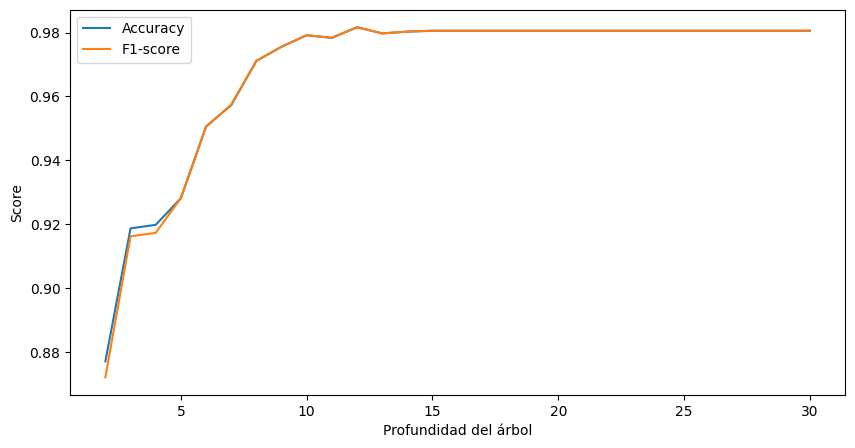

In [ ]:
# Visualizar resultados en gráfica
plt.figure(figsize=(10, 5))
plt.plot(depth_range, acc_scores, label='Accuracy')
plt.plot(depth_range, f1_scores, label='F1-score')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Score')
plt.show()


In [ ]:
tree_clf.get_depth()

15

In [ ]:
# Seleccionar profundidad óptima
opt_depth = depth_range[np.argmax(f1_scores)]
print(f"Profundidad óptima: {opt_depth}")

Profundidad óptima: 12


El algoritmo de árbol de decisión se utilizó para clasificar un conjunto de datos en 17 categorías diferentes, obteniendo una precisión del 92% en un conjunto de datos de prueba. Las métricas de evaluación adicionales proporcionan una comprensión más detallada de cómo el modelo se desempeña en cada categoría, y la matriz de confusión es especialmente útil para identificar en qué categorías el modelo tiene más dificultades para clasificar correctamente los datos. En general, el árbol de decisión es un modelo de aprendizaje automático simple pero efectivo que se puede utilizar para clasificar datos en una variedad de aplicaciones.

## **RandomForestClassifer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
# Métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9800111049416991
F1-score: 0.9799330582493009
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1317
           1       0.97      0.99      0.98      2285

    accuracy                           0.98      3602
   macro avg       0.98      0.97      0.98      3602
weighted avg       0.98      0.98      0.98      3602



In [ ]:
#Primero importamos todas las funciones para realizar los distintos modelos
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [ ]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred, average='weighted')
report_gnb = classification_report(y_test, y_pred, zero_division=0)

In [ ]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

acc_mnb = accuracy_score(y_test, y_pred)
f1_mnb = f1_score(y_test, y_pred, average='weighted')
report_mnb = classification_report(y_test, y_pred, zero_division=0)

In [ ]:
# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)

acc_cnb = accuracy_score(y_test, y_pred)
f1_cnb = f1_score(y_test, y_pred, average='weighted')
report_cnb = classification_report(y_test, y_pred, zero_division=0)


In [ ]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

acc_bnb = accuracy_score(y_test, y_pred)
f1_bnb = f1_score(y_test, y_pred, average='weighted')
report_bnb = classification_report(y_test, y_pred, zero_division=0)

In [ ]:
# Mostrar los resultados
print('GaussianNB')
print('Accuracy:', acc_gnb)
print('F1-score:', f1_gnb)
print('Classification Report:\n', report_gnb)

print('MultinomialNB')
print('Accuracy:', acc_mnb)
print('F1-score:', f1_mnb)
print('Classification Report:\n', report_mnb)

print('ComplementNB')
print('Accuracy:', acc_cnb)
print('F1-score:', f1_cnb)
print('Classification Report:\n', report_cnb)

print('BernoulliNB')
print('Accuracy:', acc_bnb)
print('F1-score:', f1_bnb)
print('Classification Report:\n', report_bnb)


GaussianNB
Accuracy: 0.42032204330927264
F1-score: 0.304655556983955
Classification Report:
               precision    recall  f1-score   support

           0       0.39      1.00      0.56      1317
           1       1.00      0.09      0.16      2285

    accuracy                           0.42      3602
   macro avg       0.69      0.54      0.36      3602
weighted avg       0.78      0.42      0.30      3602

MultinomialNB
Accuracy: 0.7040533037201555
F1-score: 0.6987372932611462
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      1317
           1       0.75      0.81      0.78      2285

    accuracy                           0.70      3602
   macro avg       0.68      0.67      0.67      3602
weighted avg       0.70      0.70      0.70      3602

ComplementNB
Accuracy: 0.7412548584119933
F1-score: 0.7439960759852109
Classification Report:
               precision    recall  f1-score   support

       